## Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations

### Step1: Gather Data

#### Import library

In [333]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
%matplotlib inline
folder_name = 'Twitter'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#### Extract WeRateDogs Twitter archive file

In [7]:
#Activity1 - The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand.
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_ids=twitter_archive['tweet_id']
twitter_ids.drop_duplicates(inplace=True)

#### Extract tweet image predictions File

In [8]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:    
    file.write(response.content)

image_predictions= pd.read_csv(folder_name+'/'+'image-predictions.tsv','\t')

image_predictions.head(1)

#image_predictions.to_csv("twitter_data.csv")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Extract Twitter feeds via API

In [28]:
from timeit import default_timer as timer
import json
consumer_key = 'gLmSt5mvejJvElV9GMxM9aibM'
consumer_secret = '1dFI0dzqIBn7KrPd4amWkENxhb8ePGuxs3eHq0ykBNe9xcpOKN'
access_token = '2928378330-FL6ID7AiJar6vMhFF7iP2XoJekegx8oh1wPAD33'
access_secret = 'Qk1FSIv3LN3aRTxZ0oqQC09jGWVg3ZevsSPpe2PpDoGAv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive file
count = 0
fails_dict = []
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
            #print("Success")            
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[count] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


Rate limit reached. Sleeping for: 421
Rate limit reached. Sleeping for: 736
1595.5597897040002
[]


In [388]:
twitter_data = pd.read_json('tweet_json.txt',lines=True)
twitter_data.rename(index=str,columns={'id':'tweet_id'},inplace=True)
twitter_data=twitter_data[['tweet_id','retweet_count','favorite_count']]
twitter_data.head()



,tweet_id,retweet_count,favorite_count
0,892420643555336193,8331,38089
1,892177421306343426,6154,32683
2,891815181378084864,4073,24599
3,891689557279858688,8473,41450
4,891327558926688256,9167,39625


### Step2: Analyse

In [389]:
# Check attribute types and missing values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [390]:
# Check for duplicates 
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [391]:
twitter_archive['tweet_id'].value_counts().sort_values(ascending =False)

700151421916807169    1
676948236477857792    1
677228873407442944    1
708349470027751425    1
861383897657036800    1
668979806671884288    1
684147889187209216    1
682242692827447297    1
723179728551723008    1
673320132811366400    1
673956914389192708    1
849051919805034497    1
747844099428986880    1
855860136149123072    1
850019790995546112    1
801115127852503040    1
883360690899218434    1
732732193018155009    1
668291999406125056    1
666835007768551424    1
690348396616552449    1
701981390485725185    1
685321586178670592    1
832040443403784192    1
874296783580663808    1
673270968295534593    1
802239329049477120    1
788552643979468800    1
728387165835677696    1
684969860808454144    1
                     ..
799757965289017345    1
679405845277462528    1
847116187444137987    1
668221241640230912    1
667924896115245057    1
805932879469572096    1
855138241867124737    1
681231109724700672    1
836648853927522308    1
800855607700029440    1
6689329214583029

In [392]:
twitter_archive['name'].value_counts().sort_values(ascending=False)

None         745
a            55 
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Tucker       10 
Lola         10 
Penny        10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
an           7  
Daisy        7  
Toby         7  
Buddy        7  
Bailey       7  
Dave         6  
Leo          6  
Koda         6  
Rusty        6  
Milo         6  
Bella        6  
Scout        6  
Jax          6  
Jack         6  
Oscar        6  
Stanley      6  
Louis        5  
            ..  
Bradley      1  
Pupcasso     1  
Obi          1  
Jeremy       1  
Glenn        1  
Callie       1  
Durg         1  
Diogi        1  
Evy          1  
Biden        1  
Cuddles      1  
Huck         1  
Augie        1  
Jaycob       1  
Clyde        1  
Nugget       1  
Jomathan     1  
Sojourner    1  
Schnozz      1  
Freddery     1  
all          1  
Lance        1  
Perry        1  
Covach       1  
Comet        1  
Asher        1  
Harnold      1  
Pherb        1

In [393]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [394]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [395]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [396]:
twitter_archive['doggo'].value_counts().sort_values(ascending=False)

None     2259
doggo    97  
Name: doggo, dtype: int64

In [397]:
twitter_archive['floofer'].value_counts().sort_values(ascending=False)

None       2346
floofer    10  
Name: floofer, dtype: int64

In [398]:
twitter_archive['pupper'].value_counts().sort_values(ascending=False)

None      2099
pupper    257 
Name: pupper, dtype: int64

In [399]:
twitter_archive['puppo'].value_counts().sort_values(ascending=False)

None     2326
puppo    30  
Name: puppo, dtype: int64

In [400]:
twitter_data.info()
image_predictions.head(5) # check this through excel for easy visual analysis */

<class 'pandas.core.frame.DataFrame'>
Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 73.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Quality issues -

1) Variable 'name' within twitter_archive file is noted to have None values which needs to be replaced by Nan

2) Variable "doggo","puppuer","puppo","floofer" have "None" seems incorrect based on the text columns, hence having a single varible to depict the dog stage is neededm and remove the individual variables "doggo","puppuer","puppo","floofer"

3) Source variable needs clean up, html tags needs to be removed.

4) Name variable is noticed to have articles like ("The","A","AN") which does not reflect the right names.

5) Few tweets captured from API have missing tweets which are captured in the exception

6) There are certain tweets which are not related to dogs, noted to have tweets of cats etc.

7) Timestamp is in string format, needs to be converted to timestamp

8) We need to remove all the retweets that are within the data

###### Tidiness issues -
1) Additional data via API and Predictions to be merged to the archived data and have single master data

2) in_reply_to_status_id and in_reply_to_user_id variable in Archive file are mostly NaN values, which is not much required for analysis

3) drop all tweets prior to  August 1st, 2017

4) Timestamp needs to be converted from String to Timeformat


### Cleaning

In [401]:
# Take a copy of the data that needs to be cleaned
twitter_data_clean = twitter_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()

In [402]:
# Define 
# Fix Tidiness issues 
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_data_clean,how = 'inner', on = 'tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,how = 'inner', on = 'tweet_id')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067 

In [403]:
#Define
# Filter for tweets after August 2017, first convert to timestamp format to do this
# Code
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['timestamp']<='2017-08-31 00:00:00']


In [404]:
#Define
# Extract the dog stage from the text column, as the variables in the indivial variables does not see the right stage at certain
# places, also remove the individual variable 
twitter_archive_clean['dog_stage']=twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [405]:
#Define
# Clean the source attribute, remove HTML tags
twitter_archive_clean1=twitter_archive_clean.copy()
twitter_archive_clean1['source']=twitter_archive_clean['source'].str.extract(r'[?:<\w*\s*=*"*/*\.*]*[?:>]([\w*\s]*)[?:<*/\*\w*>*]*')
twitter_archive_clean1.head(1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8331,38089,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


In [406]:
#Define
# Drop all retweets from the analysis data
temp=twitter_archive_clean1[twitter_archive_clean1['retweeted_status_id'].notnull()]
twitter_archive_clean1=twitter_archive_clean1.drop(temp.index[0:])


In [407]:
# Store clean data into the master file
twitter_archive_clean1.to_csv("twitter_archive_master.csv")

### Analyse and Visualize

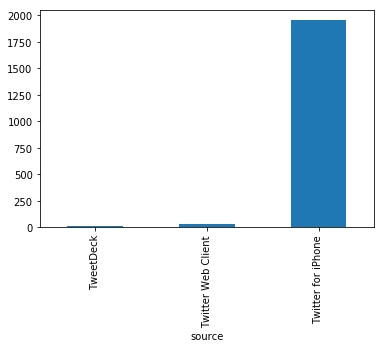

In [408]:
# Analyse on what sources contributed to the number of tweets
# Visualize 
df=twitter_archive_clean1.groupby('source')['tweet_id'].count()
df
df.plot.bar()

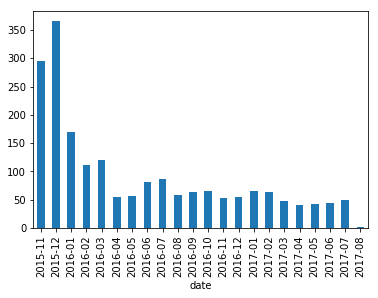

In [409]:
# Analyse the number of tweets in the time period captured
df = pd.DataFrame(columns=['date','Tweet_id'])
df['date']=twitter_archive_clean1['timestamp'].dt.to_period('M')
df['Tweet_id']=twitter_archive_clean1['tweet_id']
temp=df.groupby('date')['Tweet_id'].count()
temp.plot.bar()